#####  Wind rose plot
 
Ming Ge April 2025

In [7]:
 
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
 
from windrose import WindroseAxes
import matplotlib.cm as cm

#### read data from MPAS grid as xarray

In [5]:
flnm = '/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/diag.2014-09-11_00.00.00.nc'
ds = xr.open_dataset(flnm)
ds = ds.squeeze()

# Extract the wind variables
uu = ds["uzonal_surface"]  
vv = ds["umeridional_surface"]

# Wind speed
wind_speed = np.sqrt(uu**2 + vv**2)

# Wind direction (from which the wind is blowing, in degrees)
wind_direction = (270 - np.degrees(np.arctan2(vv, uu))) % 360
 

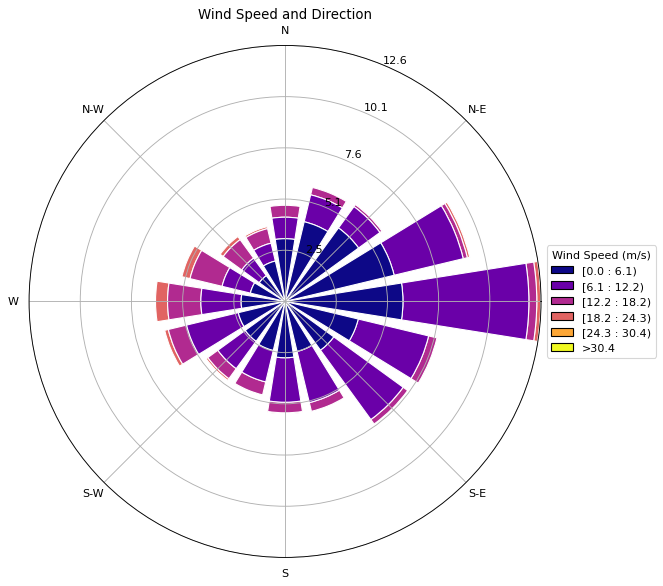

In [6]:
# Create a WindroseAxes object
ax = WindroseAxes.from_ax()

# Plot the wind rose
ax.bar(wind_direction.values, wind_speed.values, normed=True, opening=0.8, edgecolor='white', cmap=cm.plasma)

# Set the title and legend
ax.set_title('Wind Speed and Direction')
ax.legend(title='Wind Speed (m/s)', loc='center left', bbox_to_anchor=(1, 0.5))
